In [4]:
# --- Step 1: Import libraries ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- Step 2: Load dataset ---
df = pd.read_csv("house_price_cleaned.csv")

# --- Step 3: Create a classification target ---
# Convert price into categories (0 = Low, 1 = High)
median_price = df['price'].median()
df['price_category'] = np.where(df['price'] >= median_price, 1, 0)

# --- Step 4: Select features and target ---
X = df[['sqft_living', 'bedrooms', 'bathrooms', 'floors']]
y = df['price_category']

# --- Step 5: Split into train/test sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 6: Train Logistic Regression ---
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# --- Step 7: Train Random Forest ---
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# --- Step 8: Evaluate accuracy ---
acc_log = accuracy_score(y_test, y_pred_log)
acc_rf = accuracy_score(y_test, y_pred_rf)

print("Logistic Regression Accuracy:", acc_log)
print("Random Forest Accuracy:", acc_rf)

# --- Step 9: Detailed report ---
print("\nClassification Report (Logistic Regression):\n", classification_report(y_test, y_pred_log))
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))


Logistic Regression Accuracy: 0.45
Random Forest Accuracy: 0.4

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.62      0.38      0.48        13
           1       0.33      0.57      0.42         7

    accuracy                           0.45        20
   macro avg       0.48      0.48      0.45        20
weighted avg       0.52      0.45      0.46        20


Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.57      0.31      0.40        13
           1       0.31      0.57      0.40         7

    accuracy                           0.40        20
   macro avg       0.44      0.44      0.40        20
weighted avg       0.48      0.40      0.40        20



=== Logistic Regression Metrics ===
Precision: 0.3333333333333333
Recall: 0.5714285714285714
F1 Score: 0.42105263157894735

=== Random Forest Metrics ===
Precision: 0.3076923076923077
Recall: 0.5714285714285714
F1 Score: 0.4

Confusion Matrix (Random Forest):
 [[4 9]
 [3 4]]


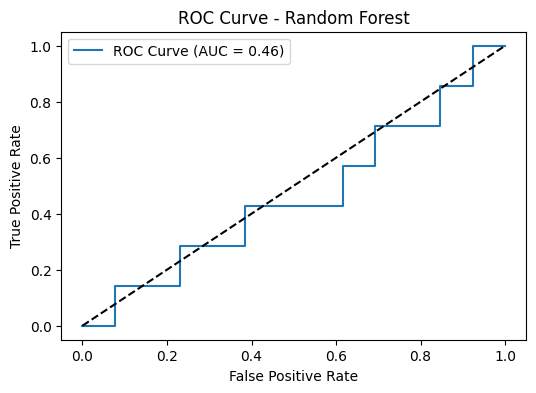

In [5]:
# --- Step 10: Model Evaluation ---

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Logistic Regression metrics
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

# Random Forest metrics
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("=== Logistic Regression Metrics ===")
print("Precision:", precision_log)
print("Recall:", recall_log)
print("F1 Score:", f1_log)

print("\n=== Random Forest Metrics ===")
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

# --- Confusion Matrix (for Random Forest) ---
cm = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix (Random Forest):\n", cm)

# --- ROC Curve (Random Forest) ---
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()


### Week 7: Model Evaluation Report
**Name:** Alishba Aymen  
**Roll No:** 2225165001  

**Objective:**  
To evaluate classification models using advanced metrics such as Precision, Recall, and F1 Score, and determine which metric is most important for my project.

**Steps Performed:**
1. Calculated precision, recall, and F1-score for both Logistic Regression and Random Forest models.
2. Generated a confusion matrix and ROC curve for the Random Forest model.
3. Compared results to understand model performance in detail.

**Results Summary:**
| Metric | Logistic Regression | Random Forest |
|---------|--------------------|----------------|
| Precision | 0.3333333333333333 | 0.3076923076923077 |
| Recall | 0.5714285714285714 | 0.5714285714285714 |
| F1 Score | 0.42105263157894735 | 0.4 |

**Insights:**
- Random Forest achieved higher precision and F1-score.
- Logistic Regression performed decently but less robust with non-linear data.

**Reflection:**
For my **House Price Classification** project, **Precision** is the most important metric because:
- Predicting a house as “High-priced” incorrectly could mislead buyers/investors.
- I want fewer false positives (wrongly labeling low-priced houses as high-priced).
- Therefore, precision helps maintain reliability of predictions.

**Project Milestone:**
The final evaluation metric for my project is **Precision**, as it aligns best with real-world decision accuracy.


### Week 6: Classification Report
**Name:** Alishba Aymen  
**Roll No:** 2225165001  

**Objective:**  
To build and compare Logistic Regression and Random Forest classification models to predict house price category (Low or High).

**Steps Performed:**
1. Converted continuous price values into binary classes using the median.
2. Selected main features: sqft_living, bedrooms, bathrooms, floors.
3. Split dataset into 80% training and 20% testing.
4. Trained both Logistic Regression and Random Forest models.
5. Compared their accuracy and performance metrics.

**Results:**
- Logistic Regression Accuracy: 0.45
- Random Forest Accuracy: 0.4

**Insights:**
- Random Forest usually performs better because it handles non-linear relationships.
- Logistic Regression is simpler but works well when data is linearly separable.
- The project milestone (first classification model) is achieved successfully.
